# Pixel Art Generator - Experimental Notebook

---

### O que você encontra nesse notebook?

Células executáveis com métodos e funções experimentais que poderão ser utilizadas no nosso backend.

In [10]:
# Imports necessários para executar as células
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [11]:
# Carrega imagem
img_gradiente = 'gradiente.jpg'
img_gengar = 'gengar.png'
img_donut = 'donut.jpg'
img_gato = 'gato.jpg'
img_astronauta = 'astronauta.jpg'
img_grafite = 'grafite.jpg'
img_arvore = 'arvore.jpg'

image_path = 'recommended-images/' + img_arvore
img = np.array(Image.open(image_path))

In [12]:
# Algoritmo desenvolvido para a AP2.
# Interpolação por vizinho mais próximo.
def nearest_neighbor_interpolation(img, scale_factor):
    # Obtém as dimensões da imagem original
    height, width = img.shape[:2]

    # Calcula as novas dimensões
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Cria uma nova matriz para a imagem redimensionada
    resized = np.zeros((new_height, new_width) + img.shape[2:], dtype=img.dtype)

    # Calcula a posição correspondente na imagem original para cada pixel da nova imagem
    for i in range(new_height):
        for j in range(new_width):
            orig_i = min(int(i / scale_factor), height - 1)
            orig_j = min(int(j / scale_factor), width - 1)
            resized[i, j] = img[orig_i, orig_j]
            
    # Retorna a imagem para o tamanho original mantendo o efeito pixelado
    final_image = np.zeros((height, width) + img.shape[2:], dtype=img.dtype)
    for i in range(height):
        for j in range(width):
            orig_i = min(int(i / (height / new_height)), new_height - 1)
            orig_j = min(int(j / (width / new_width)), new_width - 1)
            final_image[i, j] = resized[orig_i, orig_j]

    return final_image

In [13]:
# Algoritmo desenvolvido para a AP2
# Interpolação bilinear
def bilinear_interpolation(img, scale_factor):
    # Obtém as dimensões da imagem original
    height, width = img.shape[:2]

    # Calcula as novas dimensões
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Cria uma nova matriz para a imagem redimensionada
    resized = np.zeros((new_height, new_width) + img.shape[2:], dtype=np.float32)

    # Calcula as coordenadas correspondentes na imagem original para cada pixel da nova imagem
    x = np.linspace(0, width - 1, new_width)
    y = np.linspace(0, height - 1, new_height)

    # Cria uma grade de coordenadas
    x, y = np.meshgrid(x, y)

    # Encontra os quatro vizinhos mais próximos
    x0 = np.floor(x).astype(int)
    x1 = np.minimum(x0 + 1, width - 1)
    y0 = np.floor(y).astype(int)
    y1 = np.minimum(y0 + 1, height - 1)

    # Calcula os pesos para cada vizinho
    wx = x - x0
    wy = y - y0

    # Realiza a interpolação bilinear
    for c in range(img.shape[2]):
        resized[..., c] = (
            (1 - wx) * (1 - wy) * img[y0, x0, c] +
            wx * (1 - wy) * img[y0, x1, c] +
            (1 - wx) * wy * img[y1, x0, c] +
            wx * wy * img[y1, x1, c]
        )

    # Converte de volta para uint8
    resized = np.clip(resized, 0, 255).astype(np.uint8)
    
    # Agora redimensiona de volta para o tamanho original, mantendo o estilo pixel-art
    final_resized = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            orig_i = min(int(i / (img.shape[0] / resized.shape[0])), resized.shape[0] - 1)
            orig_j = min(int(j / (img.shape[1] / resized.shape[1])), resized.shape[1] - 1)
            final_resized[i, j] = resized[orig_i, orig_j]

    # Retorna a imagem com efeito pixel-art
    return final_resized

In [14]:
# Função para quantização da imagem
def quantize(img, palette_size):
    Z = img.reshape((-1, 3))
    Z = np.float32(Z)
    _, labels, centers = cv2.kmeans(Z, palette_size, None,
                                    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
                                    attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    return centers[labels.flatten()].reshape(img.shape)

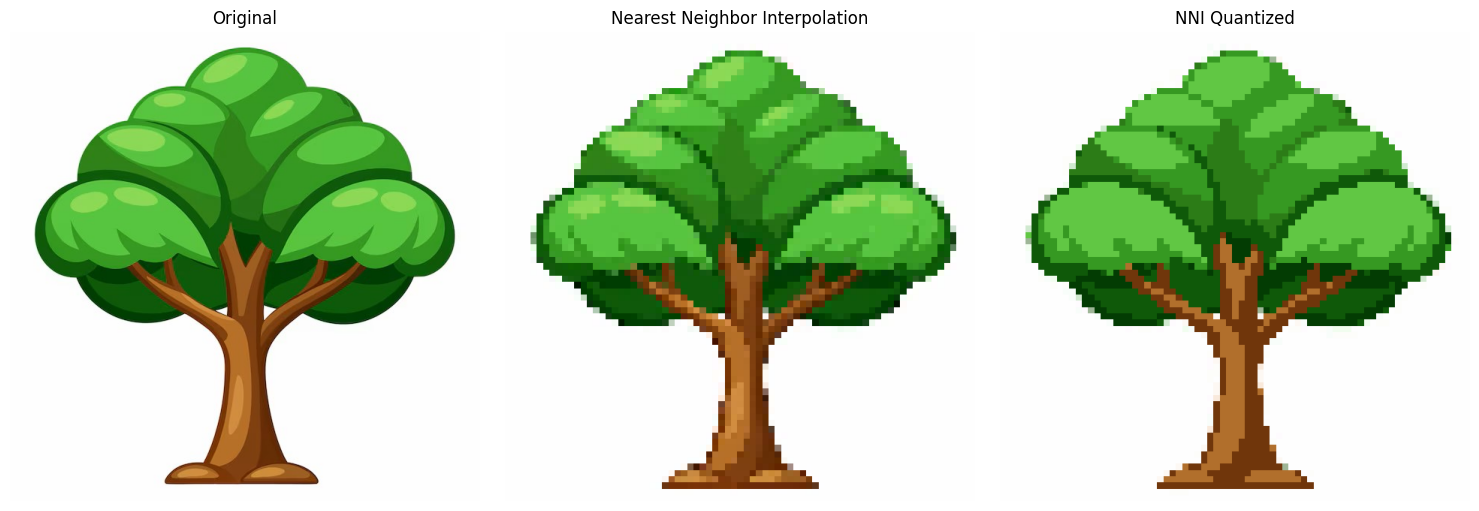

Forma da imagem original: (626, 626, 3)
Forma da imagem que utilizou interpolação por vizinho mais próximo: (626, 626, 3)


In [15]:
# Efeito de pixel-art utilizando interpolação por vizinho mais próximo.
reduced_using_nni = nearest_neighbor_interpolation(img, 0.12)

# Aplicamos um efeito de quantização para reduzir a paleta de cores
quantized_nni = quantize(reduced_using_nni, 16)

# Exibe imagem original + imagem interpolada + imagem interpolada com quantização
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(img)
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(reduced_using_nni)
ax2.set_title('Nearest Neighbor Interpolation')
ax2.axis('off')

ax3.imshow(quantized_nni)
ax3.set_title('NNI Quantized')
ax3.axis('off')


plt.tight_layout()
plt.show()

# Imprime as formas das imagens
print(f'Forma da imagem original: {img.shape}')
print(f'Forma da imagem que utilizou interpolação por vizinho mais próximo: {reduced_using_nni.shape}')

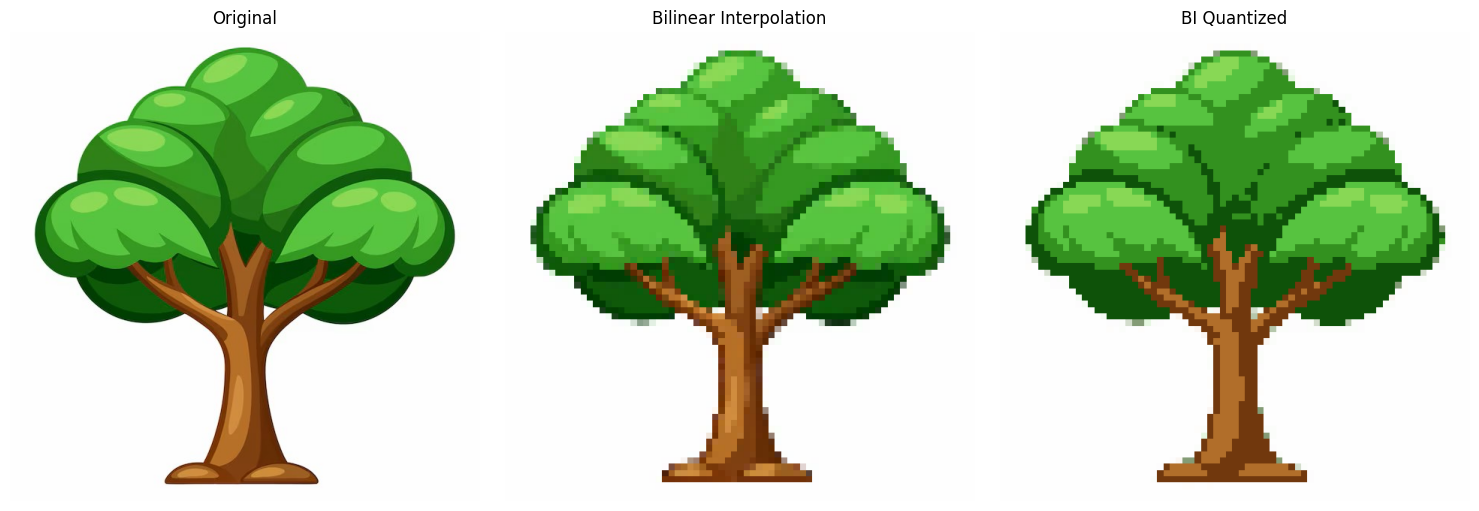

Forma da imagem original: (626, 626, 3)
Forma da imagem que utilizou interpolação bilinear: (626, 626, 3)


In [16]:
# Efeito de pixel-art utilizando interpolação bilinear.
reduced_using_bi = bilinear_interpolation(img, 0.12)

# Aplicamos um efeito de quantização para reduzir a paleta de cores
quantized_bi = quantize(reduced_using_bi, 16)

# Exibe imagem original + imagem interpolada
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(img)
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(reduced_using_bi)
ax2.set_title('Bilinear Interpolation')
ax2.axis('off')

ax3.imshow(quantized_bi)
ax3.set_title('BI Quantized')
ax3.axis('off')

plt.tight_layout()
plt.show()

# Imprime as formas das imagens
print(f'Forma da imagem original: {img.shape}')
print(f'Forma da imagem que utilizou interpolação bilinear: {reduced_using_bi.shape}')

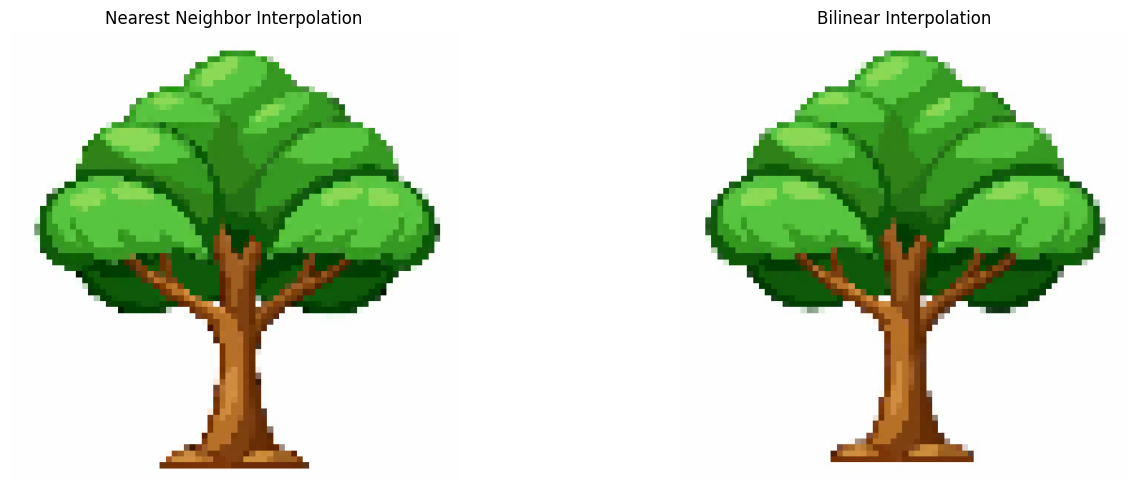

In [17]:
# Comparação entre as pixel-art geradas usando NNI e BI

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(reduced_using_nni)
ax1.set_title('Nearest Neighbor Interpolation')
ax1.axis('off')

ax2.imshow(reduced_using_bi)
ax2.set_title('Bilinear Interpolation')
ax2.axis('off')

plt.tight_layout()
plt.show()


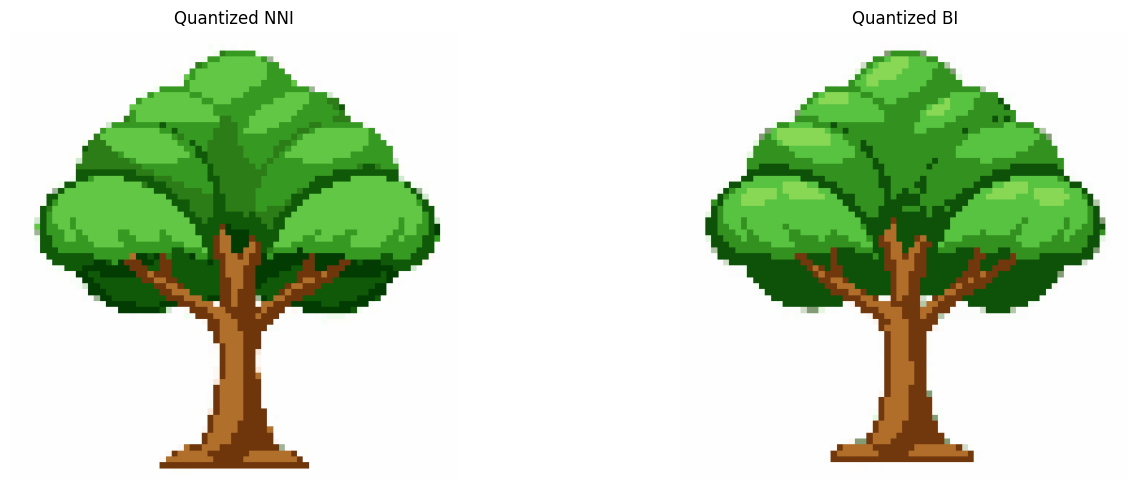

In [18]:
# Comparação entre as pixel-art geradas usando NNI e BI, mas já quantizadas

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(quantized_nni)
ax1.set_title('Quantized NNI')
ax1.axis('off')

ax2.imshow(quantized_bi)
ax2.set_title('Quantized BI')
ax2.axis('off')

plt.tight_layout()
plt.show()